In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('driver-data.csv')

In [5]:
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [6]:
df.shape

(4000, 3)

In [7]:
def minmax(x):
    xs = (x - x.min())/(x.max() - x.min()) 
    return xs

In [8]:
df_new=minmax(df.iloc[:,1:])

In [9]:
df_new.head()

,mean_dist_day,mean_over_speed_perc
0,0.243032,0.28
1,0.161425,0.25
2,0.213809,0.27
3,0.175208,0.22
4,0.170367,0.25


In [10]:
from sklearn.cluster import KMeans

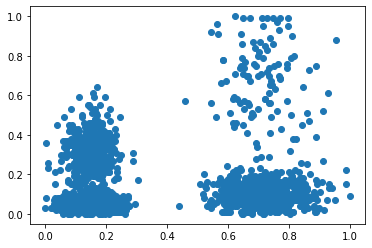

In [11]:
plt.scatter(df_new['mean_dist_day'],df_new['mean_over_speed_perc'])
plt.show()

In [12]:
sse=[]
k_range=range(1,30)
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(df_new[['mean_dist_day','mean_over_speed_perc']])
    sse.append(km.inertia_)

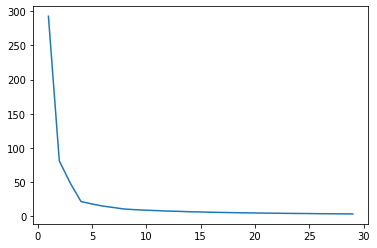

In [13]:
plt.plot(k_range,sse)
plt.show()

In [14]:
km=KMeans(n_clusters=4)

In [15]:
Y_pred=km.fit_predict(df_new[['mean_dist_day','mean_over_speed_perc']])

In [16]:
df['clusters']=Y_pred

In [17]:
df.head()

,id,mean_dist_day,mean_over_speed_perc,clusters
0,3423311935,71.24,28,2
1,3423313212,52.53,25,2
2,3423313724,64.54,27,2
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2


In [18]:
df0=df[df.clusters==0]
df1=df[df.clusters==1]
df2=df[df.clusters==2]
df3=df[df.clusters==3]

In [19]:
df0.head()

,id,mean_dist_day,mean_over_speed_perc,clusters
5,3423313857,41.91,10,0
7,3423311434,52.02,8,0
22,3423312268,55.15,18,0
27,3423312113,45.75,16,0
41,3423313389,61.69,12,0


In [20]:
df1.head()

,id,mean_dist_day,mean_over_speed_perc,clusters
3206,3423313932,199.81,32,1
3213,3423313466,211.36,5,1
3215,3423311847,208.47,26,1
3220,3423311045,186.28,4,1
3241,3423313048,162.56,23,1


In [21]:
df2.head()

,id,mean_dist_day,mean_over_speed_perc,clusters
0,3423311935,71.24,28,2
1,3423313212,52.53,25,2
2,3423313724,64.54,27,2
3,3423311373,55.69,22,2
4,3423310999,54.58,25,2


In [22]:
df3.head()

,id,mean_dist_day,mean_over_speed_perc,clusters
3200,3423314190,179.22,95,3
3201,3423314144,192.34,69,3
3202,3423314442,140.25,92,3
3203,3423313001,184.28,70,3
3204,3423311047,200.58,50,3


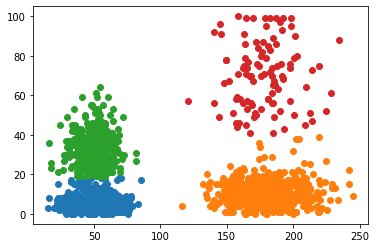

In [23]:
plt.scatter(df0['mean_dist_day'],df0['mean_over_speed_perc'])
plt.scatter(df1['mean_dist_day'],df1['mean_over_speed_perc'])
plt.scatter(df2['mean_dist_day'],df2['mean_over_speed_perc'])
plt.scatter(df3['mean_dist_day'],df3['mean_over_speed_perc'])
plt.show()